# Particle Diffusion
|Author | Stanley A. Baronett|
|-------|--------------------|
|Created|  1/31/2022         |
|Updated|  7/04/2022         |

## $t_\mathrm{lim}$ Abs. Max. Dust Velocities

In [ ]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import numpy as np

runs = ['AB', 'BA']
Pis = [0.01, 0.02, 0.05, 0.10]
res = 2048
dirs = ['v_p,x', 'v_p,z']
vels = [None, None]
vpmaxs = [[[4.9014116835902712e-02, 6.9901924241410424e-02],
           [1.1131780624371951e-01, 1.2851029144559772e-01],
           [2.1246485981185287e-01, 2.7507636579252753e-01],
           [4.2330050901055599e-01, 5.4153697266332279e-01]],
          [[1.6028950749236612e-01, 1.0658793968704268e-01],
           [3.7310835676954823e-01, 2.1727610846700082e-01],
           [8.1245752475401367e-01, 3.6080757214776110e-01],
           [9.7114961815499423e-01, 5.7261392023932234e-01]]] # vpmaxs[run][Pi][dir]

for i, run in enumerate(runs):
    for j, Pi in enumerate(Pis):
        athinput = athena_read.athinput(f'../unstrat/{run:s}/{Pi:.2f}/{res:n}/athinput.si')
        Lx = athinput['mesh']['x1max'] - athinput['mesh']['x1min'] # [H]
        if Pi == 0.01:
            print(f'\n{run} (Lx = Lz = {Lx} / H)')
        print(f'  Π = {Pi:.2f}')

        for k, dir in enumerate(dirs):
            vels[k] = vpmaxs[i][j][k]/Lx/2
            print(f'    |{dir:s},max| = {vels[k]:.2f} [(L/2)/T]')
        
        Dt = 1/np.amax(vels)
        print(f'         dt_max = {Dt:.2f} [T/(L/2)]')



AB (Lx = Lz = 0.1 / H)
  Π = 0.01
    |v_p,x,max| = 0.25 [(L/2)/T]
    |v_p,z,max| = 0.35 [(L/2)/T]
         dt_max = 2.86 [T/(L/2)]
  Π = 0.02
    |v_p,x,max| = 0.56 [(L/2)/T]
    |v_p,z,max| = 0.64 [(L/2)/T]
         dt_max = 1.56 [T/(L/2)]
  Π = 0.05
    |v_p,x,max| = 1.06 [(L/2)/T]
    |v_p,z,max| = 1.38 [(L/2)/T]
         dt_max = 0.73 [T/(L/2)]
  Π = 0.10
    |v_p,x,max| = 2.12 [(L/2)/T]
    |v_p,z,max| = 2.71 [(L/2)/T]
         dt_max = 0.37 [T/(L/2)]

BA (Lx = Lz = 2.0 / H)
  Π = 0.01
    |v_p,x,max| = 0.04 [(L/2)/T]
    |v_p,z,max| = 0.03 [(L/2)/T]
         dt_max = 24.95 [T/(L/2)]
  Π = 0.02
    |v_p,x,max| = 0.09 [(L/2)/T]
    |v_p,z,max| = 0.05 [(L/2)/T]
         dt_max = 10.72 [T/(L/2)]
  Π = 0.05
    |v_p,x,max| = 0.20 [(L/2)/T]
    |v_p,z,max| = 0.09 [(L/2)/T]
         dt_max = 4.92 [T/(L/2)]
  Π = 0.10
    |v_p,x,max| = 0.24 [(L/2)/T]
    |v_p,z,max| = 0.14 [(L/2)/T]
         dt_max = 4.12 [T/(L/2)]


## Johansen & Youdin (2007) Comparison

In [ ]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import numpy as np
from pathlib import Path

def pdiff(a, b):
    pd = 200*np.abs(a - b)/(a + b)
    return pd

workdir = '../unstrat'
cases = ['AB', 'BA']
Pi = '0.05'
reses = ['256', '2048']
jy07 = [[4.4e-5, 2.9e-5], [2.2e-3, 1.5e-2]]

print('Case\tτₛ\tε\tRes.\tD_x\tDiff.\tD_z\tDiff.')
print('\t\t\t\t[cₛ²/Ω]\t[%]\t[cₛ²/Ω]\t[%]')
print('=============================================================')

for i, case in enumerate(cases):
    for res in reses:
        path = f'{workdir}/{case}/{Pi}/{res}'
        athinput = athena_read.athinput(f'{path}/athinput.si')
        epsilon = athinput['problem']['epsilon']
        
        if case == 'BA' and res == '2048':
            break
        elif case == 'AB' and res == '2048':
            dcoeff = np.load(f'{path}/output/dcoeff-20.npz')
        else:
            dcoeff = np.load(f'{path}/output/dcoeff-81.npz')

        taus = dcoeff['taus']
        dpx = dcoeff['dpx'][0]/2/np.pi
        dpz = dcoeff['dpy'][0]/2/np.pi
        pdx = pdiff(dpx, jy07[i][0])
        pdz = pdiff(dpz, jy07[i][1])
        
        print(f'{case}\t{taus:.1f}\t{epsilon:.1f}\t{res}²'\
                +f'\t{dpx:.1e}\t{pdx:.1f}\t{dpz:.1e}\t{pdz:.1f}')
    
    print('-------------------------------------------------------------')


Case	τₛ	ε	Res.	D_x	Diff.	D_z	Diff.
				[cₛ²/Ω]	[%]	[cₛ²/Ω]	[%]
AB	0.1	1.0	256²	5.1e-05	15.3	4.1e-05	33.6
AB	0.1	1.0	2048²	3.5e-05	23.7	2.3e-05	25.2
-------------------------------------------------------------
BA	1.0	0.2	256²	1.8e-03	20.2	5.7e-03	90.5
-------------------------------------------------------------


## Convergence Tests

### 256²

Text(0.5, 0.98, '256$^2$')

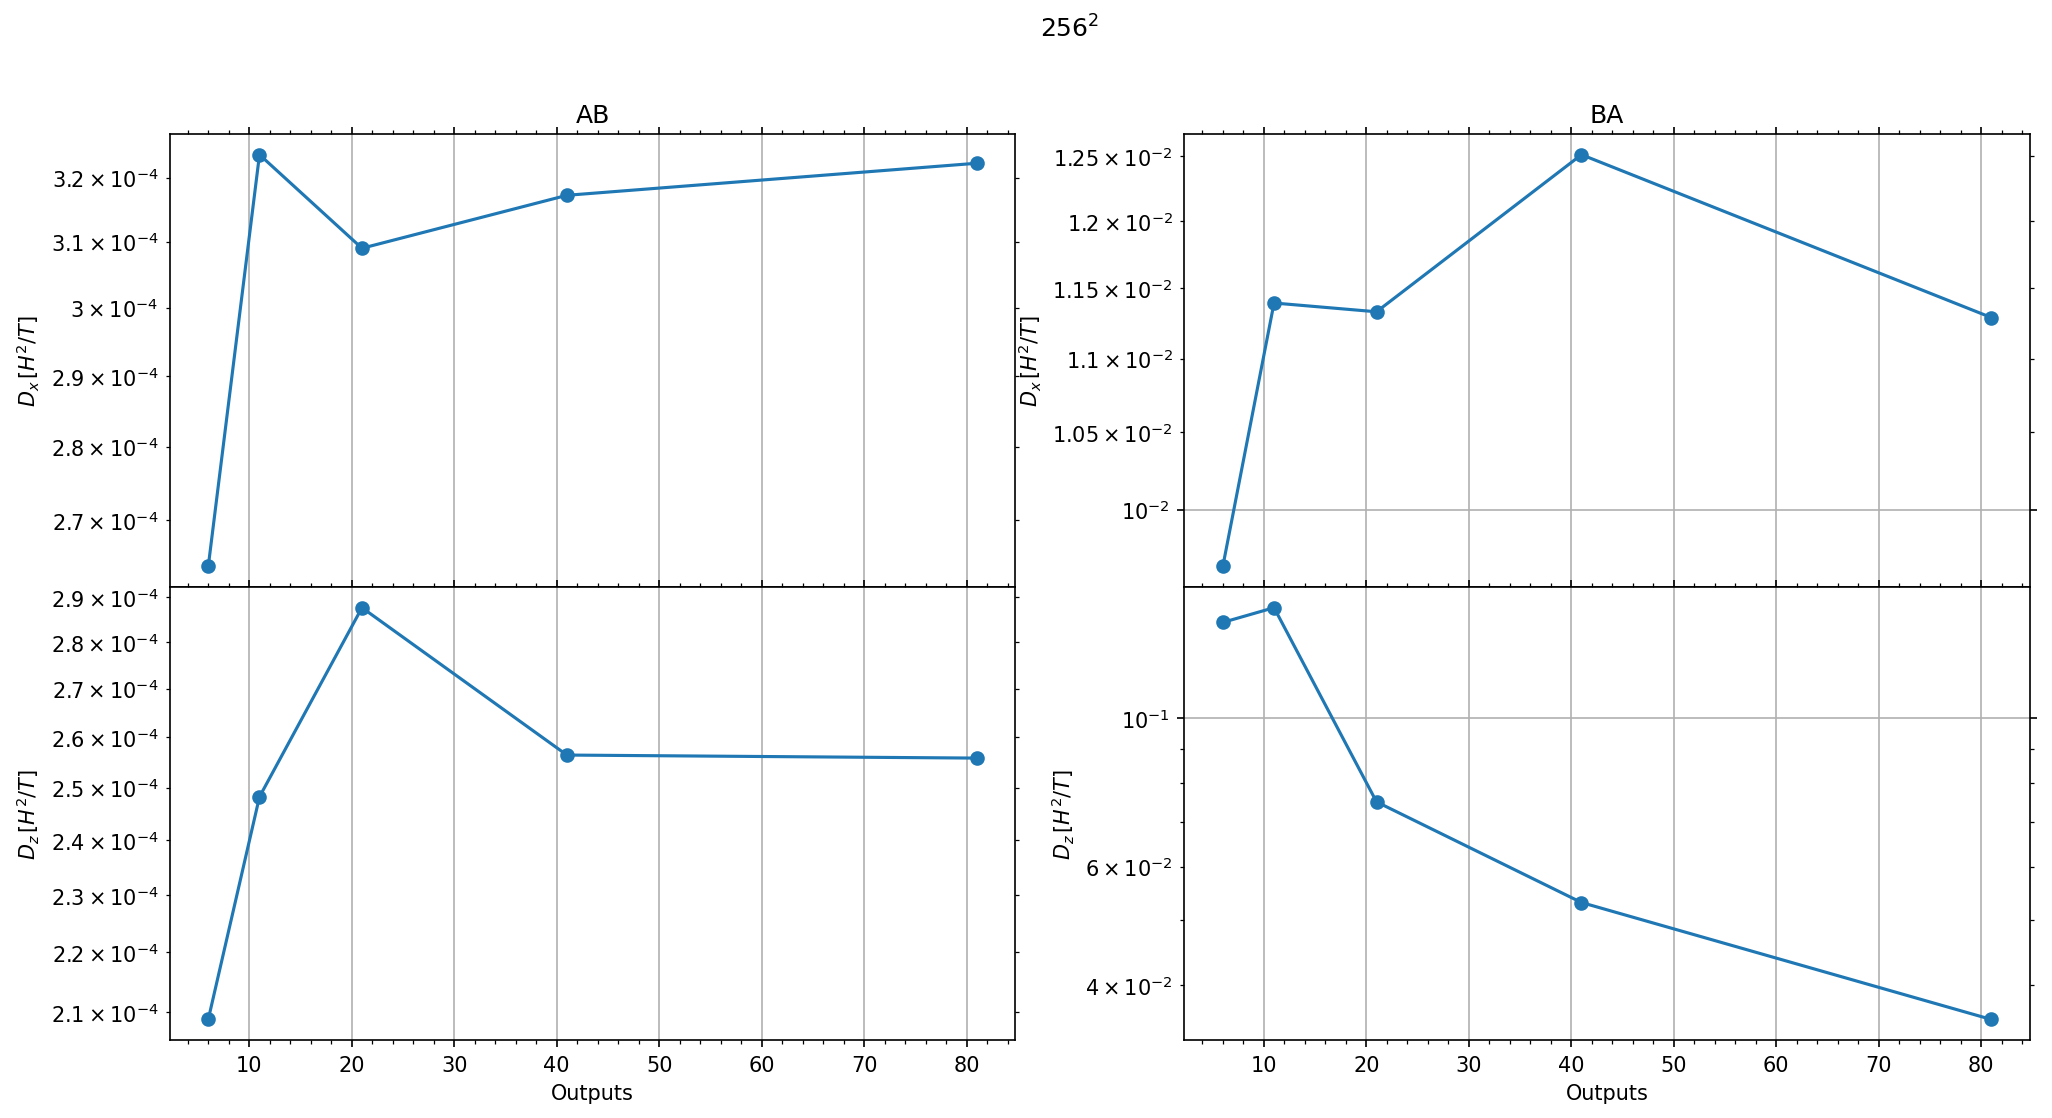

In [47]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, sharex=True, figsize=(16,8), dpi=150)
workdir = '../unstrat'
cases = ['AB', 'BA']
Pi = '0.05'
res = '256'
nouts = [6, 11, 21, 41, 81]
dpxs, dpzs = np.zeros(len(nouts)), np.zeros(len(nouts))
dirs = ['x', 'z']

for i, case in enumerate(cases):
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    epsilon = athinput['problem']['epsilon']
    pi = athinput['problem']['duy0']

    axs[0, i].set_title(case)

    for j, nout in enumerate(nouts):
        dcoeff = np.load(f'{path}/output/dcoeff-{nout}.npz')
        dpxs[j], dpzs[j] =  dcoeff['dpx'][0], dcoeff['dpy'][0]

    for j, dir in enumerate(dirs):
        axs[j, i].grid()
        axs[j, i].minorticks_on()
        if dir == 'x': axs[j, i].semilogy(nouts, dpxs, '-o')
        else: axs[j, i].semilogy(nouts, dpzs, '-o')
        axs[j, i].set(ylabel=f'$D_{{{dir}}}\,[H^2/T]$')
        axs[j, i].tick_params(which='both', top=True, right=True)

axs[1,0].set(xlabel=r'Outputs')
axs[1,1].set(xlabel=r'Outputs')
plt.subplots_adjust(hspace=0)
plt.suptitle(f'{res}$^2$')
# plt.savefig('figs/dcoeff_conv.png', bbox_inches='tight', pad_inches=0.01)

### 2048²

Text(0.5, 0.98, '2048$^2$')

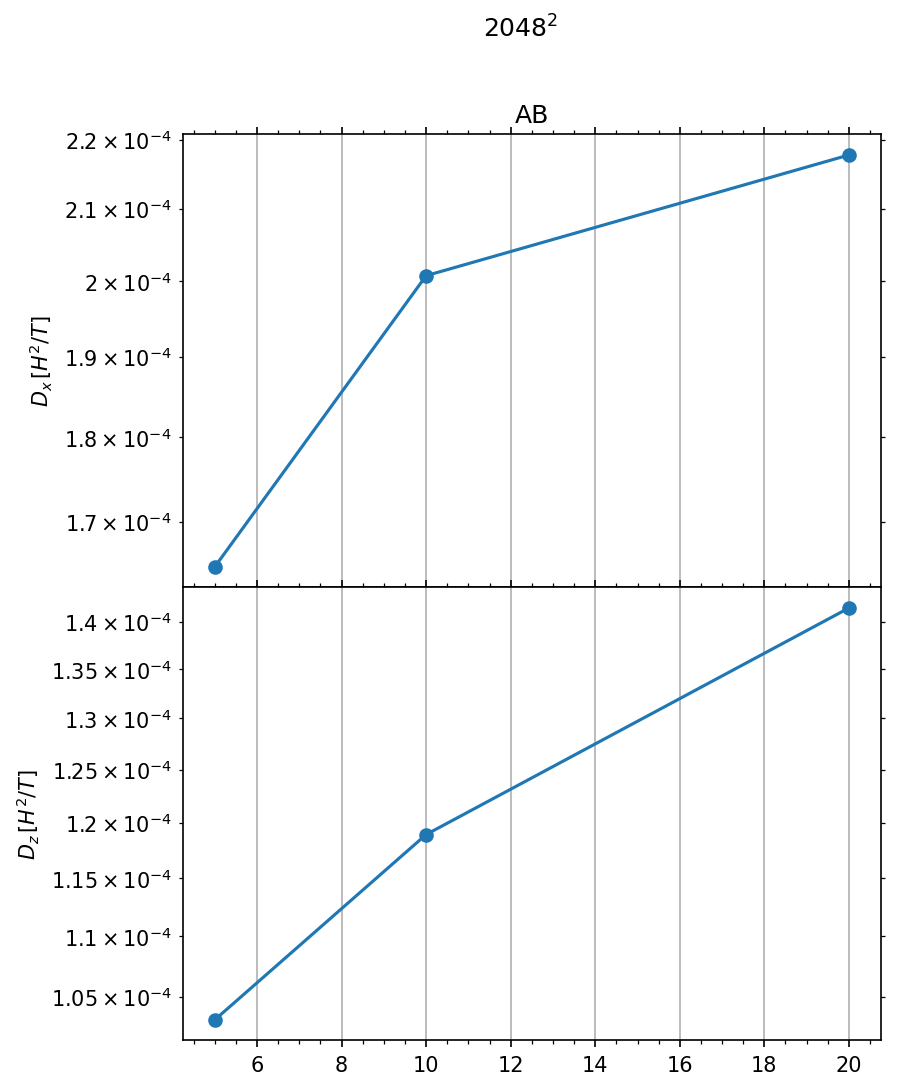

In [76]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(6,8), dpi=150)
workdir = '../unstrat'
cases = ['AB']#, 'BA']
Pi = '0.05'
res = '2048'
nouts = [5, 10, 20]
dpxs, dpzs = np.zeros(len(nouts)), np.zeros(len(nouts))
dirs = ['x', 'z']

for i, case in enumerate(cases):
    path = f'{workdir}/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    epsilon = athinput['problem']['epsilon']
    pi = athinput['problem']['duy0']

    axs[0].set_title(case)

    for j, nout in enumerate(nouts):
        dcoeff = np.load(f'{path}/output/dcoeff-{nout}.npz')
        dpxs[j], dpzs[j] =  dcoeff['dpx'][0], dcoeff['dpy'][0]

    for j, dir in enumerate(dirs):
        axs[j].grid()
        axs[j].minorticks_on()
        if dir == 'x': axs[j].semilogy(nouts, dpxs, '-o')
        else: axs[j].semilogy(nouts, dpzs, '-o')
        axs[j].set(ylabel=f'$D_{{{dir}}}\,[H^2/T]$')
        axs[j].tick_params(which='both', top=True, right=True)

axs[0].set(xlabel=r'Outputs')
plt.subplots_adjust(hspace=0)
plt.suptitle(f'{res}$^2$')
# plt.savefig('figs/dcoeff_conv.png', bbox_inches='tight', pad_inches=0.01)

## Displacement Snapshots

### Radial

AB
	Δt = 1.0,	σ = 2.5e-02
	Δt = 2.0,	σ = 3.5e-02
	Δt = 3.0,	σ = 4.4e-02
BA
	Δt = 10.0,	σ = 4.1e-01
	Δt = 20.0,	σ = 6.0e-01
	Δt = 30.0,	σ = 7.7e-01


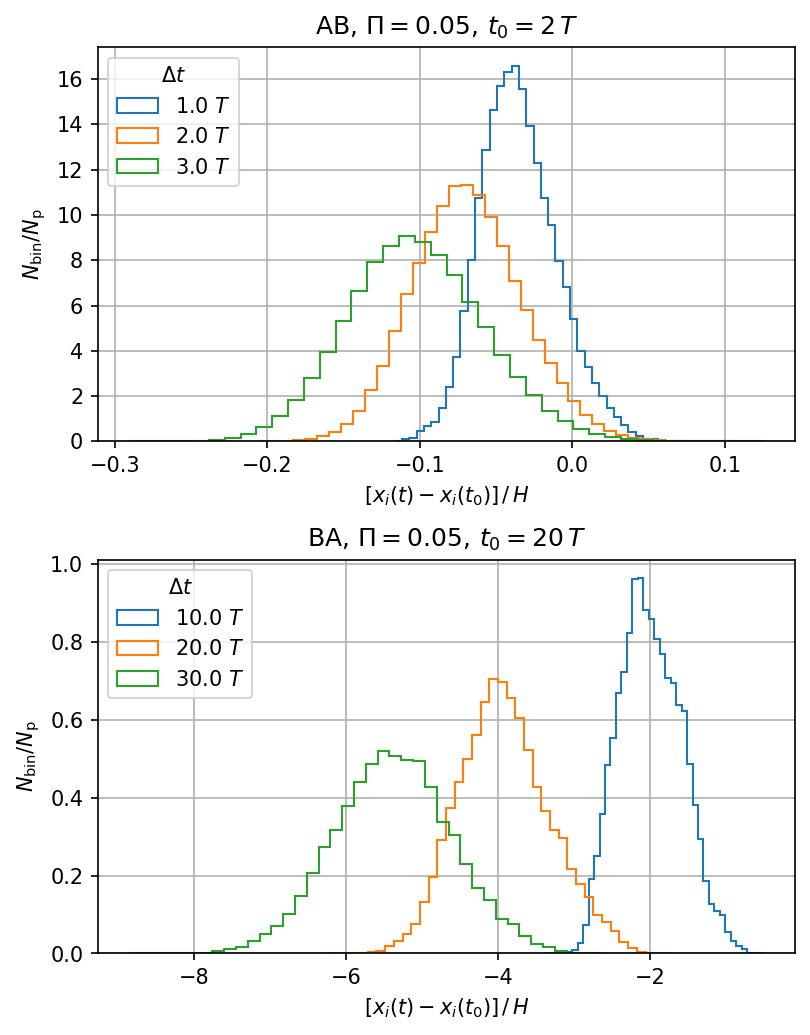

In [77]:
import sys
sys.path.insert(0, '/home/stanley/github/sabaronett/local/athena/athena-dust/vis/python')
import athena_read
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

cases = ['AB', 'BA']
t0s = [2, 20]
Pi = 0.05
res = 256
bins = 40
fig, axs = plt.subplots(2, 1, figsize=(6, 8), dpi=150)

for i, case in enumerate(cases):
    path = f'../unstrat/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    epsilon = athinput['problem']['epsilon']
    disp = np.load(f'{path}/dat/disp.npz')

    print(f'{case}')

    for j in range(10, 31, 10):
        t, dxp = disp['t'][j], disp['dxp'][j]
        sigma = np.std(dxp)
        print(f'\tΔt = {t:2.1f},\tσ = {sigma:.1e}')
        axs[i].hist(dxp, bins=bins, density=True, histtype='step',
                    label=f'{t:.1f} $T$')
    
    axs[i].grid()
    axs[i].legend(title=r'$\Delta t$')
    axs[i].set(title=f'{case}, $\Pi={{{Pi}}},\,t_0={{{t0s[i]}}}\,T$',
               xlabel='$[x_i(t) - x_i(t_0)]\,/\,H$',
               ylabel=r'$N_\mathrm{bin}/N_\mathrm{p}$')

fig.subplots_adjust(hspace=0.3)


### Vertical

AB
	Δt = 1.0,	σ = 2.4e-02
	Δt = 2.0,	σ = 3.4e-02
	Δt = 3.0,	σ = 3.9e-02
BA
	Δt = 10.0,	σ = 4.3e-01
	Δt = 20.0,	σ = 7.6e-01
	Δt = 30.0,	σ = 1.3e+00


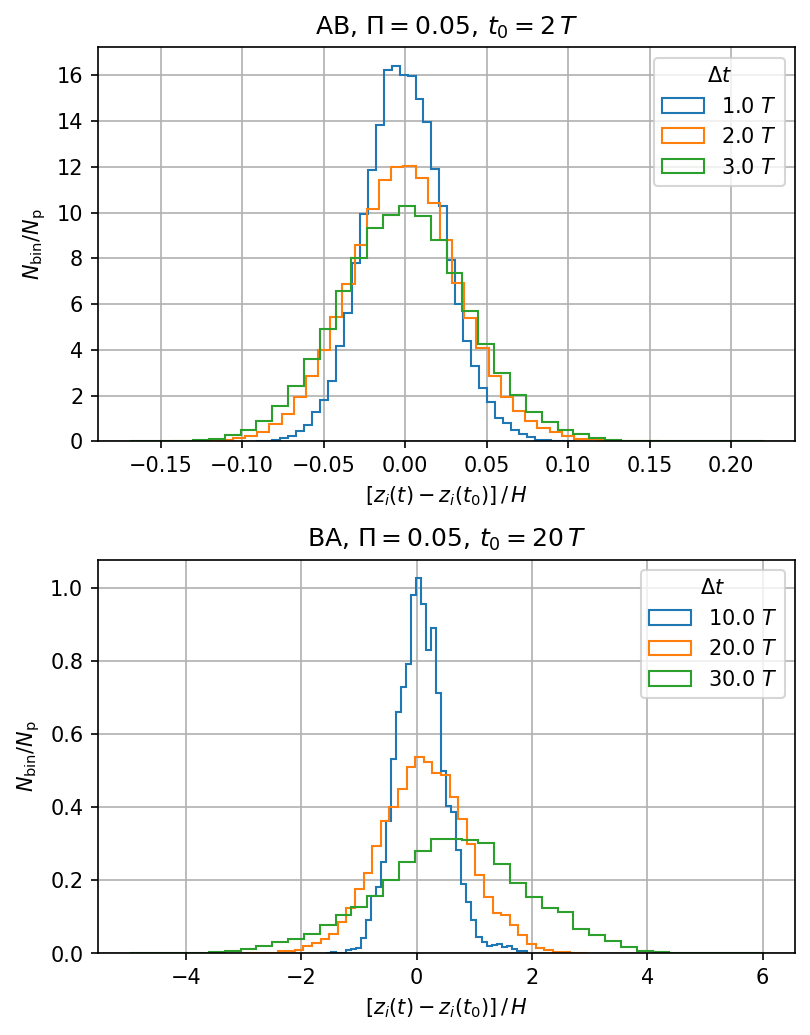

In [70]:
import sys
sys.path.insert(0, '/home/stanley/github/sabaronett/local/athena/athena-dust/vis/python')
import athena_read
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

cases = ['AB', 'BA']
t0s = [2, 20]
Pi = 0.05
res = 256
bins = 40
fig, axs = plt.subplots(2, 1, figsize=(6, 8), dpi=150)

for i, case in enumerate(cases):
    path = f'../unstrat/{case}/{Pi}/{res}'
    athinput = athena_read.athinput(f'{path}/athinput.si')
    epsilon = athinput['problem']['epsilon']
    disp = np.load(f'{path}/dat/disp.npz')

    print(f'{case}')

    for j in range(10, 31, 10):
        t, dzp = disp['t'][j], disp['dyp'][j]
        sigma = np.std(dzp)
        print(f'\tΔt = {t:2.1f},\tσ = {sigma:.1e}')
        axs[i].hist(dzp, bins=bins, density=True, histtype='step',
                    label=f'{t:.1f} $T$')
    
    axs[i].grid()
    axs[i].legend(title=r'$\Delta t$')
    axs[i].set(title=f'{case}, $\Pi={{{Pi}}},\,t_0={{{t0s[i]}}}\,T$',
               xlabel='$[z_i(t) - z_i(t_0)]\,/\,H$',
               ylabel=r'$N_\mathrm{bin}/N_\mathrm{p}$')

fig.subplots_adjust(hspace=0.3)


## Variance Evolution & Fit Comparison

### AB/0.05/256

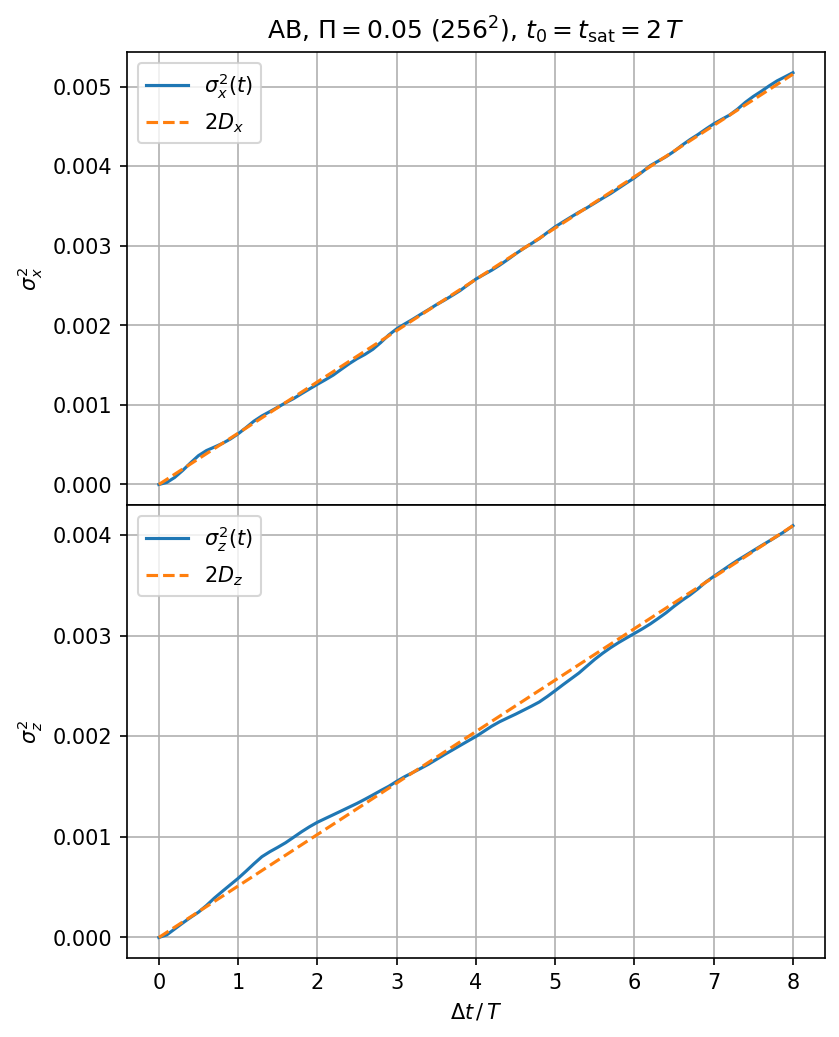

In [1]:
import sys
sys.path.insert(0, '/home/stanley/github/sabaronett/local/athena/athena-dust/vis/python')
import athena_read
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

workdir = '../unstrat'
case = 'AB'
t0 = 2
tfit = np.asarray([0, 8])
Pi = 0.05
res = 256
dirs = ['x', 'z']
fig, axs = plt.subplots(2, 1, figsize=(6, 8), dpi=150)

path = f'{workdir}/{case}/{Pi}/{res}'
athinput = athena_read.athinput(f'{path}/athinput.si')
Pi = athinput['problem']['duy0']
taus = athinput['particles']['taus0']*athinput['problem']['omega']
epsilon = athinput['problem']['epsilon']
res = athinput['mesh']['nx1']
disp = np.load(f'{path}/dat/disp.npz')
dcoeffs = np.load(f'{path}/output/dcoeff-81.npz')
sat = 'sat'
if round(taus, 1) == 0.1 and epsilon == 1.0: case = 'AB'
elif round(taus, 1) == 1.0 and epsilon == 0.2: case = 'BA'
else: case = '?'
title = f'{case}, $\Pi={Pi}$ ({res}$^2$), $t_0=t_\mathrm{{{sat}}}={t0}\,T$'

axs[0].set(title=title)
axs[1].set(xlabel='$\Delta t\,/\,T$')

for i, dir in enumerate(dirs):
    if dir == 'x':
        vars = np.var(disp['dxp'], axis=1)
        dcoeff = dcoeffs['dpx'][0]
    else:
        vars = np.var(disp['dyp'], axis=1)
        dcoeff = dcoeffs['dpy'][0]
    
    axs[i].grid()
    axs[i].plot(disp['t'], vars, label=f'$\sigma_{{{dir}}}^2(t)$')
    axs[i].plot(tfit, 2*dcoeff*tfit, '--', label=f'$2D_{{{dir}}}$')
    axs[i].legend()
    axs[i].set(ylabel=f'$\sigma_{{{dir}}}^2$')

fig.subplots_adjust(hspace=0)


### BA/0.05/256

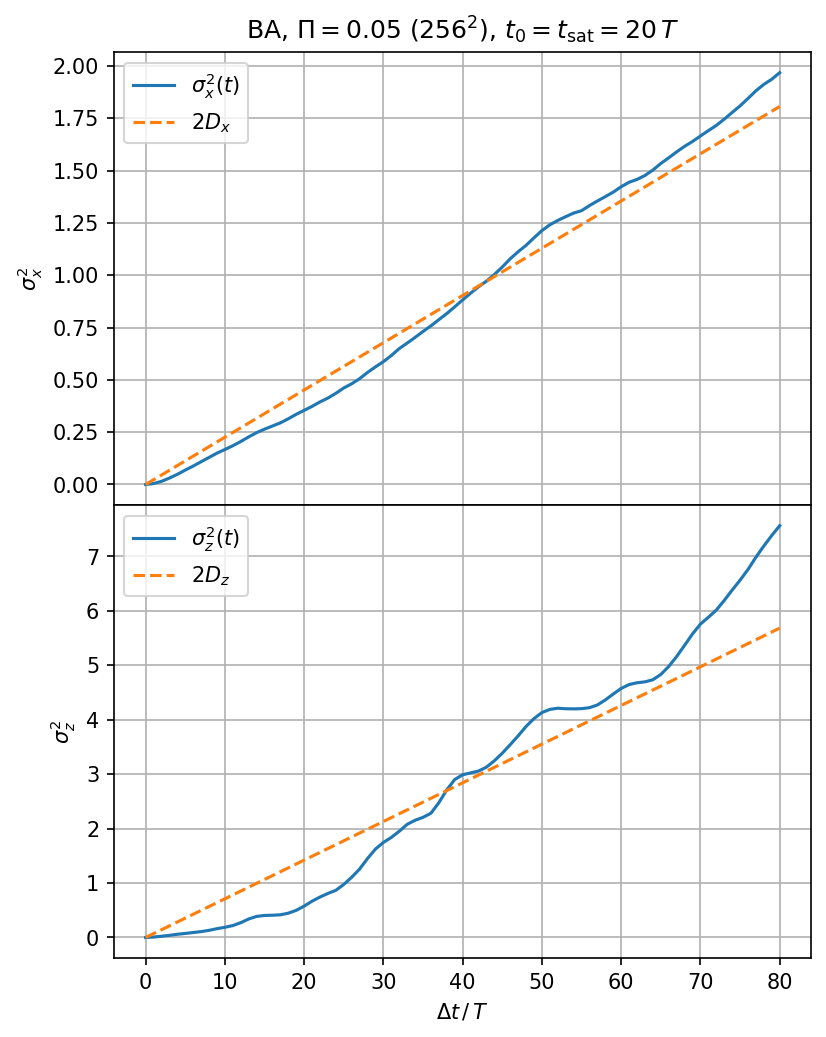

In [19]:
import sys
sys.path.insert(0, '/home/stanley/github/sabaronett/local/athena/athena-dust/vis/python')
import athena_read
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

workdir = '../unstrat'
case = 'BA'
t0 = 20
tfit = np.asarray([0, 80])
Pi = 0.05
res = 256
dirs = ['x', 'z']
fig, axs = plt.subplots(2, 1, figsize=(6, 8), dpi=150)

path = f'{workdir}/{case}/{Pi}/{res}'
athinput = athena_read.athinput(f'{path}/athinput.si')
Pi = athinput['problem']['duy0']
taus = athinput['particles']['taus0']*athinput['problem']['omega']
epsilon = athinput['problem']['epsilon']
res = athinput['mesh']['nx1']
disp = np.load(f'{path}/dat/disp.npz')
dcoeffs = np.load(f'{path}/output/dcoeff-81.npz')
sat = 'sat'
if round(taus, 1) == 0.1 and epsilon == 1.0: case = 'AB'
elif round(taus, 1) == 1.0 and epsilon == 0.2: case = 'BA'
else: case = '?'
title = f'{case}, $\Pi={Pi}$ ({res}$^2$), $t_0=t_\mathrm{{{sat}}}={t0}\,T$'

axs[0].set(title=title)
axs[1].set(xlabel='$\Delta t\,/\,T$')

for i, dir in enumerate(dirs):
    if dir == 'x':
        vars = np.var(disp['dxp'], axis=1)
        dcoeff = dcoeffs['dpx'][0]
    else:
        vars = np.var(disp['dyp'], axis=1)
        dcoeff = dcoeffs['dpy'][0]
    
    axs[i].grid()
    axs[i].plot(disp['t'], vars, label=f'$\sigma_{{{dir}}}^2(t)$')
    axs[i].plot(tfit, 2*dcoeff*tfit, '--', label=f'$2D_{{{dir}}}$')
    axs[i].legend()
    axs[i].set(ylabel=f'$\sigma_{{{dir}}}^2$')

fig.subplots_adjust(hspace=0)


## $D$ vs. $\Pi$

,Case,Function,$a$,$\pm\sigma_a$,$k$,$\pm\sigma_k$
0,AB,$D_x = a\Pi^k$,7.5e-02,$\pm$5.5e-03,1.9e+00,$\pm$3.1e-02
1,AB,$D_z = a\Pi^k$,2.2e-02,$\pm$2.9e-04,1.7e+00,$\pm$5.6e-03


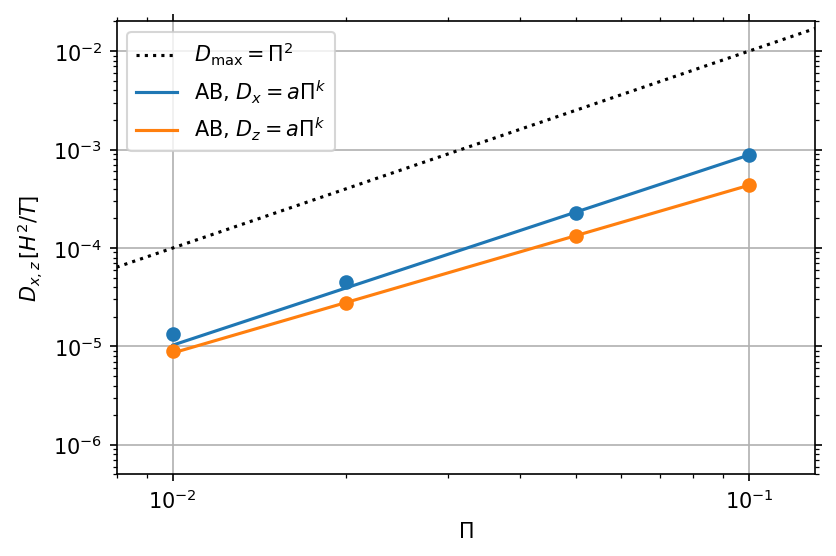

In [11]:
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

workdir = '../unstrat'
cases = [['AB', 'solid']]#, ['BA', 'dashed']]
Pis = [0.01, 0.02, 0.05, 0.10]
res = '2048'
dirs = [['x', 'dpx', 'tab:blue'],
        ['z', 'dpy', 'tab:orange']]
dcoeffs = np.zeros((len(Pis), len(dirs)))
func = lambda x, a, k : a*x**k # Power-law model function
group, modfunc, a, aerr, k, kerr = [], [], [], [], [], []
xfit = np.linspace(0, 0.2)
fig, ax = plt.subplots(dpi=150)

ax.plot(xfit, func(xfit, 1, 2), ls=':', color='black',
        label='$D_\mathrm{max} = \Pi^2$')

for case in cases:
    for i, dir in enumerate(dirs):
        for j, Pi in enumerate(Pis):
            path = f'{workdir}/{case[0]}/{Pi:.2f}/{res}'
            if case[0] == 'AB' and Pi == 0.01:
                dcoeff = np.load(f'{path}/output/dcoeff-60.npz')
            else: dcoeff = np.load(f'{path}/output/dcoeff-80.npz')
            dcoeffs[j, i] = dcoeff[dir[1]][0]

        popt, pcov = curve_fit(func, Pis, dcoeffs[:, i])
        perr = np.sqrt(np.diag(pcov))
        form = f'$D_{dir[0]} = a\Pi^k$'
        label = f'{case[0]}, {form}'
        
        ax.plot(Pis, dcoeffs[:, i], 'o', color=dir[2])
        ax.plot(Pis, func(np.asarray(Pis), *popt), ls=case[1],
                color=dir[2], label=label)
        group.append(case[0]); modfunc.append(form)
        a.append(popt[0]); aerr.append(perr[0])
        k.append(popt[1]); kerr.append(perr[1])

ax.grid()
ax.legend()#ncol=2)
ax.minorticks_on()
ax.set(xlabel=r'$\Pi$', ylabel='$D_{x,z}\,[H^2/T]$', xscale='log',
       yscale='log', xlim=(8e-3, 0.13), ylim=(5e-7, 2e-2))
ax.tick_params(which='both', top=True, right=True)
plt.savefig('figs/dcoeffs.pdf', bbox_inches='tight', pad_inches=0.01)
plt.savefig('figs/dcoeffs.png', bbox_inches='tight', pad_inches=0.01)

df = pd.DataFrame({
    'Case'          : group,
    'Function'      : modfunc,
    '$a$'           : a,
    '$\pm\sigma_a$' : aerr,
    '$k$'           : k,
    '$\pm\sigma_k$' : kerr,})
s = df.style.format({
    '$a$'           : '{:.1e}',
    '$\pm\sigma_a$' : '$\pm${:.1e}',
    '$k$'           : '{:.1e}',
    '$\pm\sigma_k$' : '$\pm${:.1e}',})
s.to_latex(buf='tabs/dcoeffs.txt')
s